In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle


In [2]:
train=pd.read_csv("train_data_evaluation_part_2.csv")

In [3]:
train

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.00,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.00,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.00,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,82575,82576,SWE,51.0,12,114,190.08,6.0,0,0,...,0,0,0,0,1,0,0,0,0,0
82576,82576,82577,SWE,50.0,12,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
82577,82577,82578,DEU,50.0,12,18,222.00,255.0,0,0,...,0,0,0,0,0,0,0,0,0,0
82578,82578,82579,PRT,NaN,12,11,255.00,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,...,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,...,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,...,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [6]:
sum(train['Age'].isna())

3746

## There are few na values i.e less than 5% percent of data with missing value so i choose to drop it

In [7]:
train.dropna(inplace=True)

In [8]:
train["BookingsCheckedIn"].value_counts()

1     58920
0     18571
2      1059
3       118
4        56
5        20
6        18
7        15
8        10
9         9
10        7
11        6
13        4
12        3
14        2
15        2
29        2
23        2
20        1
24        1
40        1
18        1
25        1
57        1
26        1
17        1
66        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [9]:
train["BookingsNoShowed"].value_counts()

0    78796
1       31
2        6
3        1
Name: BookingsNoShowed, dtype: int64

## Very less percentage of customers have not shown after booking so can be treated as redundant feature. 

In [10]:
train["BookingsCanceled"].value_counts()

0    78736
1       74
2       10
3        8
4        5
9        1
Name: BookingsCanceled, dtype: int64

## Very less percentage of customers have canceled after booking so can be treated as redundant feature.

In [11]:
train.drop(["Unnamed: 0",'ID',"BookingsCanceled","BookingsNoShowed"], axis=1, inplace=True)

## Similarly checking the rest of the features for redundantcy

In [12]:
for i in train.columns:
    print(train[i].value_counts())

FRA    12307
DEU    10164
GBR     8610
PRT     7638
ESP     4863
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64
50.0     2015
51.0     2013
54.0     1965
53.0     1913
49.0     1871
         ... 
110.0       1
91.0        1
122.0       1
96.0        1
109.0       1
Name: Age, Length: 105, dtype: int64
212     268
232     239
22      225
101     222
281     222
       ... 
1080      4
1073      4
1087      3
473       3
919       1
Name: DaysSinceCreation, Length: 1083, dtype: int64
0      21034
1       1540
6        992
2        966
5        924
       ...  
340        1
424        1
361        1
408        1
533        1
Name: AverageLeadTime, Length: 417, dtype: int64
0.00       18920
126.00       615
234.00       571
249.00       494
89.00        327
           ...  
1264.84        1
619.14         1
212.80         1
787.52         1
288.18         1
Name: LodgingRevenue, Length: 9913, dtype: int64
0.00     

In [30]:
list=train.columns.drop(['OtherRevenue','LodgingRevenue'])

## Checking for outliers

In [ ]:
sns.boxplot(data=train[list], orient='h')

In [ ]:
sns.boxplot(data=train[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']],orient='h')

In [ ]:
sns.boxplot(data=train['AverageLeadTime'], orient='h')

In [ ]:
train[train['AverageLeadTime']>275]['AverageLeadTime'].value_counts()

In [ ]:
train.drop(train[train['AverageLeadTime']>275].index, inplace=True)

In [14]:
train.corr()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
Age,1.000000,0.125970,0.251712,0.051373,0.116581,0.130474,0.110803,0.130274,0.160810,0.161821,...,0.007169,-0.017266,0.010652,-0.117421,-0.003077,0.013670,0.012988,0.009559,-0.010679,0.014094
DaysSinceCreation,0.125970,1.000000,0.134294,0.090162,0.157007,0.272285,0.243975,0.241511,0.905885,0.909993,...,0.006484,-0.009585,-0.005274,-0.035947,-0.025467,-0.022719,-0.001697,0.011394,-0.011354,-0.049042
AverageLeadTime,0.251712,0.134294,1.000000,0.217474,0.242221,0.243048,0.350210,0.327600,0.243836,0.240051,...,-0.000850,-0.007210,0.008272,-0.040311,-0.017878,0.078178,0.000143,-0.000295,-0.006525,0.007338
LodgingRevenue,0.051373,0.090162,0.217474,1.000000,0.537068,0.406006,0.655173,0.674279,0.201981,0.211888,...,0.005677,0.003203,0.012062,-0.017372,0.009343,0.006604,0.004302,0.011950,-0.001103,0.052833
OtherRevenue,0.116581,0.157007,0.242221,0.537068,1.000000,0.302791,0.536998,0.489000,0.230554,0.237095,...,0.007840,0.007853,0.011885,0.001678,0.011037,0.012283,0.001084,0.012175,0.005068,0.016855
BookingsCheckedIn,0.130474,0.272285,0.243048,0.406006,0.302791,1.000000,0.486931,0.653538,0.382434,0.427087,...,0.011230,-0.005422,-0.000054,-0.035915,0.008983,-0.026779,0.001117,0.009461,-0.004832,-0.008989
PersonsNights,0.110803,0.243975,0.350210,0.655173,0.536998,0.486931,1.000000,0.870884,0.374155,0.383551,...,0.005930,0.016028,0.013918,-0.011391,0.036495,0.000737,0.000633,0.014605,-0.002255,0.031166
RoomNights,0.130274,0.241511,0.327600,0.674279,0.489000,0.653538,0.870884,1.000000,0.369561,0.390672,...,0.006768,0.015321,0.012264,-0.033840,0.021222,-0.028343,0.000753,0.015367,-0.001986,0.020584
DaysSinceLastStay,0.160810,0.905885,0.243836,0.201981,0.230554,0.382434,0.374155,0.369561,1.000000,0.995321,...,0.005397,-0.008639,-0.003645,-0.044180,-0.019478,-0.021267,-0.000586,0.012111,-0.010914,-0.031019
DaysSinceFirstStay,0.161821,0.909993,0.240051,0.211888,0.237095,0.427087,0.383551,0.390672,0.995321,1.000000,...,0.007591,-0.008959,-0.003890,-0.043897,-0.017167,-0.022518,-0.000700,0.013345,-0.010964,-0.032099


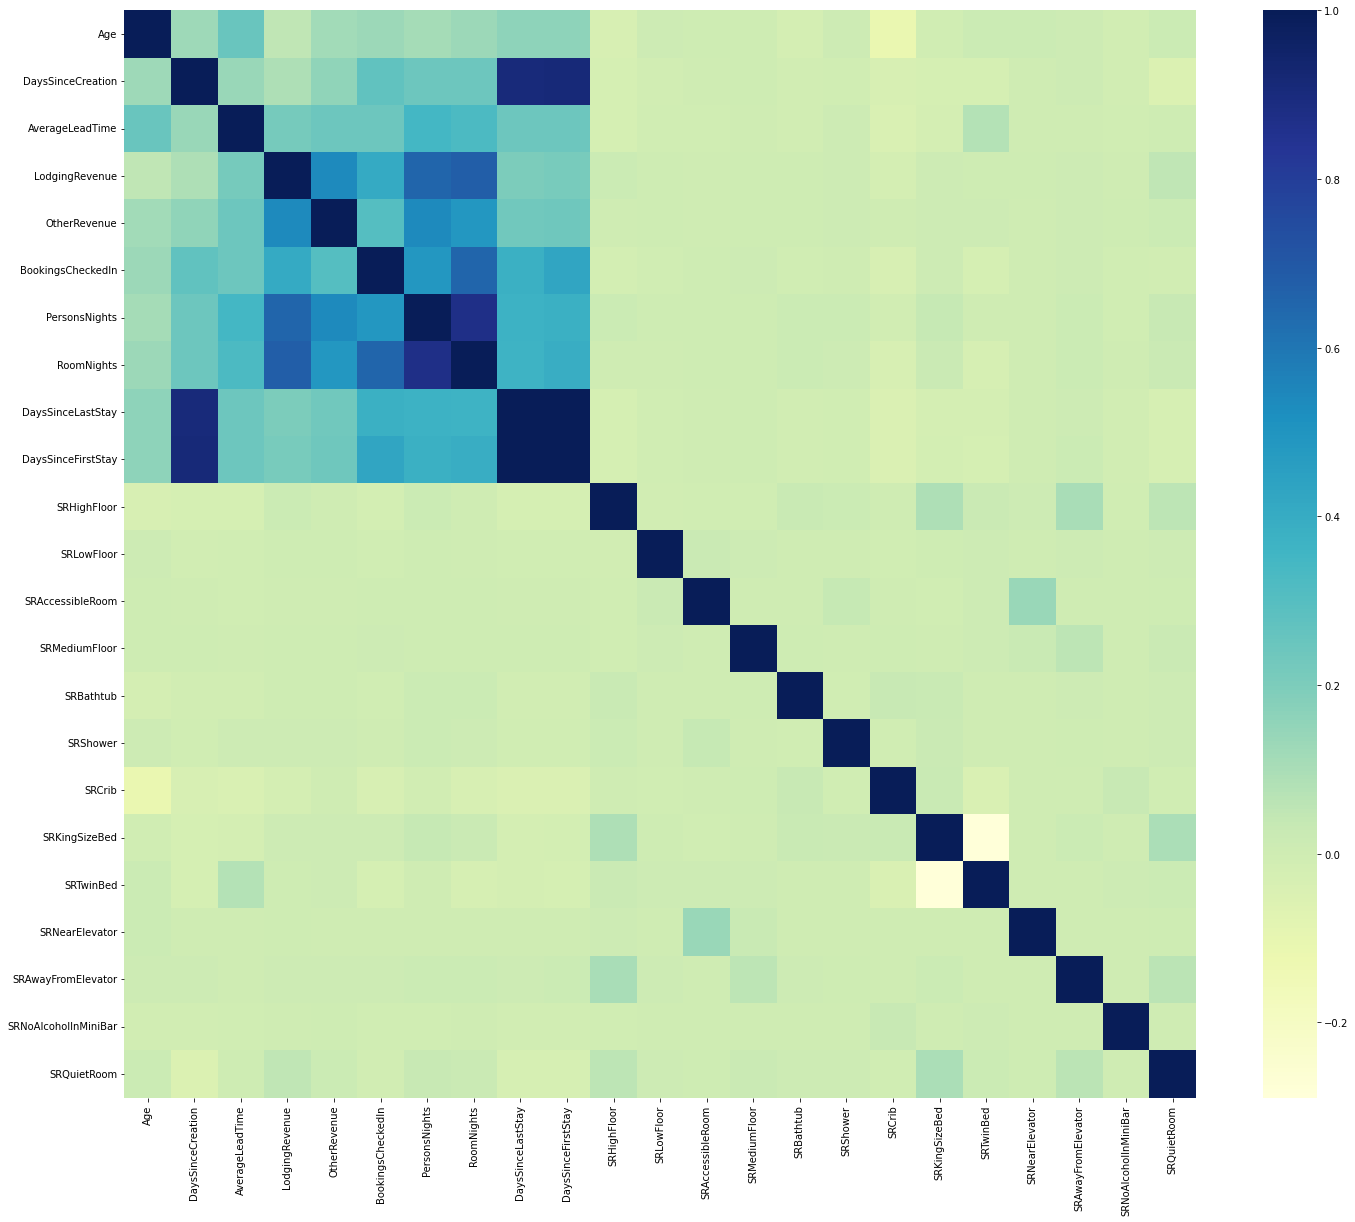

In [15]:
pt.figure(figsize=(24,20))
sns.heatmap(train.corr(), cmap="YlGnBu")
pt.show()

In [16]:
train.loc[train['BookingsCheckedIn']>=1,'BookingsCheckedIn']=1

In [17]:
train['BookingsCheckedIn'].value_counts()

1    60263
0    18571
Name: BookingsCheckedIn, dtype: int64

In [18]:
train

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.00,105.3,1,8,5,151,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.00,0.0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.00,60.0,1,10,5,1100,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.00,0.0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.00,24.0,1,4,2,1097,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82574,PRT,41.0,12,7,75.18,7.0,1,1,1,13,...,0,0,0,0,0,0,0,0,0,0
82575,SWE,51.0,12,114,190.08,6.0,1,6,3,15,...,0,0,0,0,1,0,0,0,0,0
82576,SWE,50.0,12,0,0.00,0.0,0,0,0,-1,...,0,0,0,0,1,0,0,0,0,0
82577,DEU,50.0,12,18,222.00,255.0,1,3,3,15,...,0,0,0,0,0,0,0,0,0,0


In [19]:
[train.dtypes!='object']

[Nationality             False
 Age                      True
 DaysSinceCreation        True
 AverageLeadTime          True
 LodgingRevenue           True
 OtherRevenue             True
 BookingsCheckedIn        True
 PersonsNights            True
 RoomNights               True
 DaysSinceLastStay        True
 DaysSinceFirstStay       True
 DistributionChannel     False
 MarketSegment           False
 SRHighFloor              True
 SRLowFloor               True
 SRAccessibleRoom         True
 SRMediumFloor            True
 SRBathtub                True
 SRShower                 True
 SRCrib                   True
 SRKingSizeBed            True
 SRTwinBed                True
 SRNearElevator           True
 SRAwayFromElevator       True
 SRNoAlcoholInMiniBar     True
 SRQuietRoom              True
 dtype: bool]

In [31]:
ohe= OneHotEncoder(handle_unknown='ignore', sparse= False)
ohe.fit(train[['Nationality','DistributionChannel','MarketSegment']])
tran=ohe.transform(train[['Nationality','DistributionChannel','MarketSegment']])

In [32]:
train_ohe=pd.DataFrame(tran,columns=pd.get_dummies(train[['Nationality','DistributionChannel','MarketSegment']]).columns)

In [33]:
train_dataset = pd.concat(objs=[train.drop(['Nationality','DistributionChannel','MarketSegment'],axis=1),train_ohe], axis=1)

In [34]:
train_dataset.dropna(inplace=True)

In [35]:
train_dataset.reset_index().drop('index', axis=1)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,1.0,8.0,5.0,151.0,1074.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60.0,1095.0,93.0,240.0,60.0,1.0,10.0,5.0,1100.0,1100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54.0,1095.0,58.0,230.0,24.0,1.0,4.0,2.0,1097.0,1097.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75166,42.0,57.0,22.0,436.0,28.0,1.0,4.0,4.0,61.0,61.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75167,28.0,57.0,70.0,199.8,6.0,1.0,6.0,3.0,60.0,60.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75168,26.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75169,45.0,57.0,103.0,338.0,166.6,1.0,8.0,4.0,61.0,61.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
train_x=train_dataset.drop('BookingsCheckedIn', axis=1)
train_y=train_dataset['BookingsCheckedIn']

In [37]:
train_x

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,8.0,5.0,151.0,1074.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,1095.0,93.0,240.0,60.0,10.0,5.0,1100.0,1100.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,54.0,1095.0,58.0,230.0,24.0,4.0,2.0,1097.0,1097.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78829,42.0,57.0,22.0,436.0,28.0,4.0,4.0,61.0,61.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78830,28.0,57.0,70.0,199.8,6.0,6.0,3.0,60.0,60.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78831,26.0,57.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78832,45.0,57.0,103.0,338.0,166.6,8.0,4.0,61.0,61.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
train_y

0        1.0
2        0.0
3        1.0
4        0.0
5        1.0
        ... 
78829    1.0
78830    1.0
78831    0.0
78832    1.0
78833    0.0
Name: BookingsCheckedIn, Length: 75171, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_x)

In [43]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(300, activation = 'relu', input_dim = 221))

# Adding the second hidden layer
classifier.add(Dense(100, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
classifier.fit(train_X , train_y , batch_size = 10, epochs = 7)

Epoch 1/7
7518/7518 [==============================] - 16s 2ms/step - loss: 0.0263 - accuracy: 0.9931
Epoch 2/7
7518/7518 [==============================] - 16s 2ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 3/7
7518/7518 [==============================] - 14s 2ms/step - loss: 0.0084 - accuracy: 0.9984
Epoch 4/7
7518/7518 [==============================] - 15s 2ms/step - loss: 0.0058 - accuracy: 0.9990
Epoch 5/7
7518/7518 [==============================] - 20s 3ms/step - loss: 0.0048 - accuracy: 0.9993
Epoch 6/7
7518/7518 [==============================] - 17s 2ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 7/7
7518/7518 [==============================] - 16s 2ms/step - loss: 0.0036 - accuracy: 0.9993


## Now applying changes done to train data to  test data.....

In [45]:
test= pd.read_csv('test_data_evaluation_part2.csv')


In [46]:
test.drop(["Unnamed: 0",'ID',"BookingsCanceled","BookingsNoShowed"], axis=1, inplace=True)

# trans=ohe.transform(test[['Nationality','DistributionChannel','MarketSegment']])

In [48]:
test_ohe=pd.DataFrame(trans,columns=pd.get_dummies(train[['Nationality','DistributionChannel','MarketSegment']]).columns)
test_dataset = pd.concat(objs=[test.drop(['Nationality','DistributionChannel','MarketSegment'],axis=1),test_ohe,], axis=1)
test_dataset.dropna(inplace=True)
test_dataset.reset_index().drop('index',axis=1)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,47.0,11,0,0.00,0.0,0,0,0,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16.0,11,130,483.48,155.1,1,15,5,16,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.0,11,0,0.00,0.0,0,0,0,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12.0,11,0,0.00,0.0,0,0,0,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,42.0,11,1,59.00,7.0,1,1,1,12,12,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,54.0,0,0,0.00,0.0,0,0,0,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
963,47.0,0,109,327.10,277.5,1,6,3,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
964,53.0,0,0,0.00,0.0,0,0,0,-1,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
965,85.0,0,109,981.30,9.0,1,6,3,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
test_dataset.loc[test['BookingsCheckedIn']>=1,'BookingsCheckedIn']=1

In [50]:
test_dataset['BookingsCheckedIn'].value_counts()

0    495
1    472
Name: BookingsCheckedIn, dtype: int64

In [51]:
test_x=test_dataset.drop('BookingsCheckedIn', axis=1)
test_y=test_dataset['BookingsCheckedIn']

In [52]:
test_X = sc.fit_transform(test_x)

In [53]:
test_X

array([[ 0.38008992,  2.26651254, -0.56308254, ...,  0.        ,
         0.87073637, -0.4847614 ],
       [-1.23859959,  2.26651254,  1.3743776 , ...,  0.        ,
         0.87073637, -0.4847614 ],
       [-1.29081539,  2.26651254, -0.56308254, ...,  0.        ,
         0.87073637, -0.4847614 ],
       ...,
       [ 0.69338466, -1.29567627, -0.56308254, ...,  0.        ,
         0.87073637, -0.4847614 ],
       [ 2.36428997, -1.29567627,  1.06140327, ...,  0.        ,
         0.87073637, -0.4847614 ],
       [-1.39524697, -1.29567627, -0.56308254, ...,  0.        ,
         0.87073637, -0.4847614 ]])

In [54]:
y_pred = classifier.predict(test_X)

accuracy of the model:  0.96794208893485


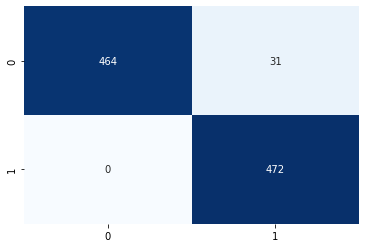

In [55]:

Matrix = confusion_matrix(test_y, y_pred.round())
sns.heatmap(Matrix,annot=True,cmap="Blues",fmt="d",cbar=False)
accuracy=accuracy_score(test_y, y_pred.round())
print('accuracy of the model: ',accuracy)

In [ ]:
file = open('job_assesment.pkl', 'wb')
pickle.dump([sc,classifier], file)

In [57]:
list11 =pd.get_dummies(train[['Nationality']]).columns

In [70]:
list22=[]
for i in list11:
    print(i+',')

Nationality_ABW,
Nationality_AGO,
Nationality_AIA,
Nationality_ALB,
Nationality_AND,
Nationality_ARE,
Nationality_ARG,
Nationality_ARM,
Nationality_ASM,
Nationality_ATA,
Nationality_ATF,
Nationality_ATG,
Nationality_AUS,
Nationality_AUT,
Nationality_AZE,
Nationality_BEL,
Nationality_BEN,
Nationality_BGD,
Nationality_BGR,
Nationality_BHR,
Nationality_BHS,
Nationality_BIH,
Nationality_BLR,
Nationality_BOL,
Nationality_BRA,
Nationality_BRB,
Nationality_BWA,
Nationality_CAF,
Nationality_CAN,
Nationality_CHE,
Nationality_CHL,
Nationality_CHN,
Nationality_CIV,
Nationality_CMR,
Nationality_COD,
Nationality_COL,
Nationality_COM,
Nationality_CPV,
Nationality_CRI,
Nationality_CUB,
Nationality_CYM,
Nationality_CYP,
Nationality_CZE,
Nationality_DEU,
Nationality_DMA,
Nationality_DNK,
Nationality_DOM,
Nationality_DZA,
Nationality_ECU,
Nationality_EGY,
Nationality_ERI,
Nationality_ESP,
Nationality_EST,
Nationality_ETH,
Nationality_FIN,
Nationality_FJI,
Nationality_FLK,
Nationality_FRA,
Nationality_FR

In [80]:
list3=[]
list2= ['IRN','TUR','HRV','CYM','AIA','MMR','THA','KNA','KEN','LAO','GRC','FJI','CAN','CHL','UMI','BGR','GIB','GTM','VEN','GNQ','PHL','POL','LKA','PER','JOR','UKR','TUN','ZAF','UGA','KAZ','HUN','TGO','SPM','DMA','SDN','ITA','GUY','MCO','MEX','ZWE','MRT','QAT','GNB','YEM','ASM','OMN','CZE','PRI','SVN','CMR','LBN','SMR','ABW','SLE','LUX','MOZ','EGY','CAF','NRU','ARE','TJK','CYP','NPL','DEU','AGO','SAU','ECU','VCT','BRB','LCA','CHE','SYR','RWA','PRT','NIC','TZA','GHA','GAB','KOR','AUS','HKG','ATA','KIR','PAN','MAR','FRO','TWN','USA','ALB','CPV','COL','IRQ','TCD','MYS','SRB','TMP','PNG','MWI','AZE','BHS','NCL','TKM','KWT','MLT','ROU','JEY','ETH','LIE','AUT','IND','VNM','BRA','AND','NOR','COM','GEO','NLD','SLV','BEN','ERI','ISR','SEN','BIH','MDV','SVK','URY','ARG','JPN','CHN','PYF','HTI','BWA','SWZ','SOM','FRA','SUR','PCN','CRI','GBR','WSM','MDG','RUS','IDN','MUS','BGD','CUB','DZA','FLK','PRY','NAM','LBY','ATG','SWE','BLR','COD','BEL','NZL','DNK','GUF','MNE','KGZ','TON','ESP','PAK','WLF','MKD','CIV','LVA','SGP','SYC','UZB','EST','NGA','MLI','BHR','JAM','GIN','STP','DOM','ISL','ATF','BOL','IOT','VIR','ARM','LTU','FIN','IRL']
for i in list2:
    list3.append(i)




In [86]:
list3.sort()

In [87]:
list3

['ABW',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATA',
 'ATF',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BEL',
 'BEN',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FLK',
 'FRA',
 'FRO',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GNB',
 'GNQ',
 'GRC',
 'GTM',
 'GUF',
 'GUY',
 'HKG',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IOT',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MCO',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NCL',
 'NGA',
 'NIC',
 'NLD',
 'NOR',


In [67]:
list22

['Nationality_ABW',
 'Nationality_AGO',
 'Nationality_AIA',
 'Nationality_ALB',
 'Nationality_AND',
 'Nationality_ARE',
 'Nationality_ARG',
 'Nationality_ARM',
 'Nationality_ASM',
 'Nationality_ATA',
 'Nationality_ATF',
 'Nationality_ATG',
 'Nationality_AUS',
 'Nationality_AUT',
 'Nationality_AZE',
 'Nationality_BEL',
 'Nationality_BEN',
 'Nationality_BGD',
 'Nationality_BGR',
 'Nationality_BHR',
 'Nationality_BHS',
 'Nationality_BIH',
 'Nationality_BLR',
 'Nationality_BOL',
 'Nationality_BRA',
 'Nationality_BRB',
 'Nationality_BWA',
 'Nationality_CAF',
 'Nationality_CAN',
 'Nationality_CHE',
 'Nationality_CHL',
 'Nationality_CHN',
 'Nationality_CIV',
 'Nationality_CMR',
 'Nationality_COD',
 'Nationality_COL',
 'Nationality_COM',
 'Nationality_CPV',
 'Nationality_CRI',
 'Nationality_CUB',
 'Nationality_CYM',
 'Nationality_CYP',
 'Nationality_CZE',
 'Nationality_DEU',
 'Nationality_DMA',
 'Nationality_DNK',
 'Nationality_DOM',
 'Nationality_DZA',
 'Nationality_ECU',
 'Nationality_EGY',


In [90]:
list12 =pd.get_dummies(train[['MarketSegment']]).columns

In [91]:
list12

Index(['MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')